In [25]:
import pandas as pd
import seaborn as sns

In [27]:
data = pd.read_csv("Titanic-Dataset.csv")

In [29]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df = pd.read_csv("Titanic-Dataset.csv", dtype={"Age": float})

In [33]:
data.drop(["Cabin"], axis=1, inplace=True)

In [35]:
# Strip spaces and convert to float
df['Age'] = df['Age'].astype(str).str.strip()
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # converts invalid entries to NaN

In [37]:
median_age = data["Age"].median()
data["Age"] = data["Age"].fillna(median_age)

In [39]:
# Drop rows where Embarked is null
data = data.dropna(subset=['Embarked'])

In [43]:
data.Sex = [1 if value == "male" else 0 for value in data.Sex]

In [45]:
# Map letters to numbers
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3}
data['Embarked'] = data['Embarked'].map(embarked_mapping)

<Axes: >

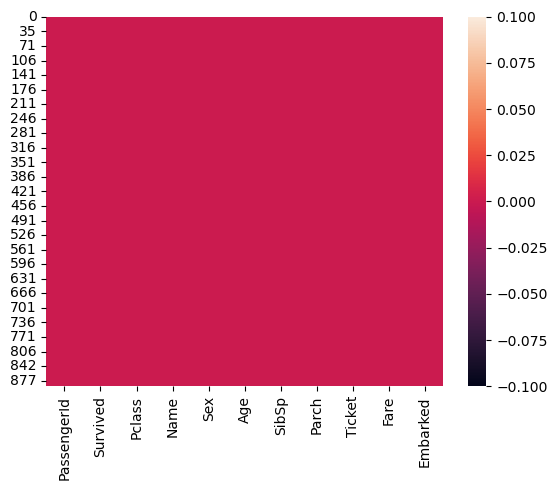

In [47]:
sns.heatmap(data.isnull())

<Axes: xlabel='Survived'>

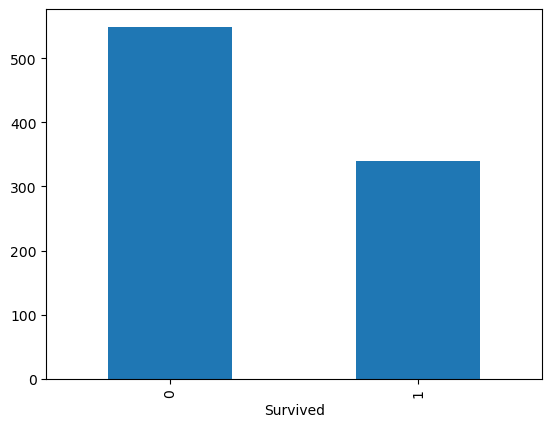

In [69]:
data.isnull().sum()
data["Survived"].value_counts().plot(kind="bar")

In [49]:
data.drop(["Ticket"], axis=1, inplace=True)

In [71]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB


In [79]:
#Split into target and predictor
y = data["Survived"]
x = data.drop(["Survived"], axis=1)

In [81]:
#normalize our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.73250451,  0.82520863,  0.        , ..., -0.47432585,
        -0.50023975, -0.56968402],
       [-1.72861124, -1.57221121,  0.        , ..., -0.47432585,
         0.78894661,  1.00313924],
       [-1.72471797,  0.82520863,  0.        , ..., -0.47432585,
        -0.48664993, -0.56968402],
       ...,
       [ 1.72471797,  0.82520863,  0.        , ...,  2.00611934,
        -0.17408416, -0.56968402],
       [ 1.72861124, -1.57221121,  0.        , ..., -0.47432585,
        -0.0422126 ,  1.00313924],
       [ 1.73250451,  0.82520863,  0.        , ..., -0.47432585,
        -0.49017322,  2.5759625 ]])

In [83]:
#Split our data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state=22)

In [85]:
#train the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [87]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [89]:
y_test

815    0
861    0
539    1
236    0
876    0
      ..
121    0
546    1
840    0
35     0
209    1
Name: Survived, Length: 267, dtype: int64

In [91]:
from sklearn.metrics import accuracy_score

In [93]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6479400749063671


In [95]:
from sklearn.pipeline import Pipeline

In [97]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=1000, solver="liblinear"))
])

In [99]:
param_grid = {
    "lr__C": [0.01, 0.1, 1, 10, 100],
    "lr__penalty": ["l1", "l2"]
}

In [103]:
from sklearn.model_selection import GridSearchCV

In [105]:
grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

In [107]:
grid.fit(x_train, y_train)

print("Best params:", grid.best_params_)

Best params: {'lr__C': 0.01, 'lr__penalty': 'l2'}


In [109]:
from sklearn.metrics import classification_report
y_pred = grid.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Test accuracy: 0.6629213483146067
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       157
           1       0.64      0.43      0.51       110

    accuracy                           0.66       267
   macro avg       0.65      0.63      0.63       267
weighted avg       0.66      0.66      0.65       267



In [111]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix (y_test, y_pred)
conf_mat

array([[130,  27],
       [ 63,  47]], dtype=int64)

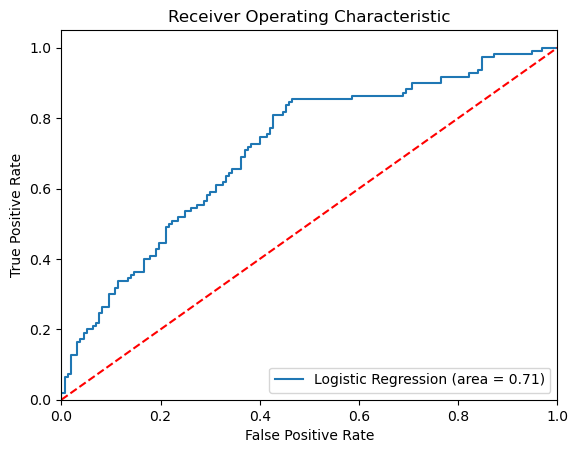

In [113]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# use predicted probabilities for the positive class
y_score = lr.predict_proba(x_test)[:, 1]

logit_roc_auc = roc_auc_score(y_test, y_score)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [115]:
probs = lr.predict_proba(x_test)[:, 1]
print(probs[:20])

[0.61922501 0.36516966 0.87778046 0.23873118 0.22531056 0.28851982
 0.14617252 0.18536534 0.2242502  0.37518985 0.43908216 0.48399981
 0.14922715 0.21759129 0.23934923 0.17004713 0.51882965 0.26021115
 0.67902178 0.93800341]
